# Project 1                                       
### Documented Colon Cancer Diagnoses (excluding rectum) in the the United States 2005-2022
---
#### Final Analysis 


 

In [393]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from matplotlib.ticker import MaxNLocator
import os


In [394]:
# Load the dataset
file_path = "/Users/alyssaberridge/Desktop/Projects/Project-1/Resources/Modified_Cleaned_Cancer_Project.csv"
df = pd.read_csv(file_path)
# Display the first few rows
df.head()

,Race,Sex,Year,Age,In the natural position of diagnosis,Localized,Regional,Distant,Unknown Stage,Total Documented Cases,Blanks/ Meets NO requirements as whole
0,White,Male/Female,2000,<1 year,1,3,1,0,0,5,0
1,White,Male/Female,2000,1-4 years,0,2,0,0,0,2,0
2,White,Male/Female,2000,5-9 years,0,43,13,0,0,56,1
3,White,Male/Female,2000,10-14 years,0,247,72,14,4,337,14
4,White,Male/Female,2000,15-19 years,8,484,179,45,21,737,42


In [395]:
# available columns
df.columns

Index(['Race', 'Sex', 'Year', 'Age', 'In the natural position of diagnosis',
       'Localized', 'Regional', 'Distant', 'Unknown Stage',
       'Total Documented Cases', 'Blanks/ Meets NO requirements as whole'],
      dtype='object')

In [396]:
# Unfiltered table results 
# Group by 'Year' and sum the 'Total Documented Cases' column
cases_per_year = df.groupby('Year')['Total Documented Cases'].sum().reset_index()

# Display the resulting table
print(cases_per_year)


    Year  Total Documented Cases
0   2000                 1811376
1   2001                       0
2   2002                       0
3   2003                       0
4   2004                       0
5   2005                  108262
6   2006                  106822
7   2007                  105884
8   2008                  105334
9   2009                  105884
10  2010                  102964
11  2011                   99544
12  2012                   97696
13  2013                   98230
14  2014                   97348
15  2015                   99574
16  2016                   99808
17  2017                   99840
18  2018                   98076
19  2019                   98700
20  2020                  100276
21  2021                   89420
22  2022                   97714


# All visuals for Total Documented Cases per year

## Table 

In [397]:
# Create output directory 
output_dir = "/Users/alyssaberridge/Desktop/Projects/Project-1/output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [398]:
# Cleaned total documented cases per year
# Clean up the 'Sex' column by removing 'Male/Female'  available columns
df_cleaned = df[df["Sex"] != "Male/Female"] 

#The the Sum of cases documented per year 
df_cleaned.groupby("Year")["Total Documented Cases"].sum()


Year
2000    905688
2001         0
2002         0
2003         0
2004         0
2005     54131
2006     53411
2007     52942
2008     52667
2009     52942
2010     51482
2011     49772
2012     48848
2013     49115
2014     48674
2015     49787
2016     49904
2017     49920
2018     49038
2019     49350
2020     50138
2021     44710
2022     48857
Name: Total Documented Cases, dtype: int64

## Bar Graph 

In [399]:
# Creating a bar graph for total cases overtime per year with whole numbers starting from 2005
# Clean up the 'Sex' column by removing 'Male/Female'
df_cleaned = df[df["Sex"] != "Male/Female"]  

# Exclude the years 2000 to 2004
df_cleaned = df_cleaned[(df_cleaned["Year"] < 2000) | (df_cleaned["Year"] > 2004)]

# Group by 'Year' and sum 'Total Documented Cases' (now using cleaned data)
df_cleaned.groupby("Year")["Total Documented Cases"].sum().plot(kind="bar", figsize=(12, 6), width=0.5)

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Documented Cases")
plt.title("Cancer Diagnoses Per Year")

# Format the y-axis to show whole numbers (integers)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Only gridlines for y-axis
plt.grid(True, axis='y', linestyle="--", alpha=0.6)

# Save the bar graph
plt.savefig(os.path.join(output_dir, "cancer_diagnoses_per_year_bar_graph.png"))
plt.close()

# Show the plot
plt.show()

## Line graph 

In [400]:
#Here's my updated line of code to create a line graph of total cases overtime per year with whole numbers starting from 2005
#single year brakets 
# Group by 'Year' and sum 'Total Documented Cases' (now using cleaned data)
df_cleaned.groupby("Year")["Total Documented Cases"].sum().plot(kind="line", marker="o", figsize=(10, 5))

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Documented Cases")
plt.title("Trend of Cancer Diagnoses Over Time")

# Format the y-axis to show whole numbers (integers)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Set x-ticks to show each year in the data
plt.xticks(ticks=df_cleaned["Year"].unique(), rotation=45)  # Ensures each year is a tick, rotated for better readability
plt.grid(True)

# Save the line graph
plt.savefig(os.path.join(output_dir, "cancer_diagnoses_over_time_line_graph.png"))
plt.close()
plt.show()

## Trend line 

In [401]:
#creating a Trendline of total cases overtime per year with whole numbers starting from 2005
# Group by 'Year' and sum 'Total Documented Cases'
df_yearly_cases = df_cleaned.groupby("Year")["Total Documented Cases"].sum()

# Plot the total documented cases as a line graph with markers
plt.figure(figsize=(10, 5))
plt.plot(df_yearly_cases.index, df_yearly_cases.values, marker="o", label="Total Documented Cases")

# Calculate the trend line (linear regression)
slope, intercept, r_value, p_value, std_err = linregress(df_yearly_cases.index, df_yearly_cases.values)

# Create the trend line
trend_line = slope * df_yearly_cases.index + intercept

# Plot the trend line
plt.plot(df_yearly_cases.index, trend_line, linestyle='--', color='red', label='Trend Line')

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Documented Cases")
plt.title("Trend of Cancer Diagnoses Over Time with Trend Line")

# Formatting y-axis to show whole numbers (integers)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Set x-ticks to show each year in the data
plt.xticks(ticks=df_cleaned["Year"].unique(), rotation=45)  # Ensures each year is a tick, rotated for better readability

# Add a legend
plt.legend(title="Legend", fontsize=10, title_fontsize=12)

# Add gridlines for better visibility
plt.grid(True)

# Save the trend line graph
plt.savefig(os.path.join(output_dir, "trend_of_cancer_diagnoses_with_trend_line.png"))
plt.close()

# Show the plot
plt.show()



# All Visuals for each stage of diagnosis per year

## Table 

In [402]:
# Cleaned Table for each stage diagnosed per year starting at 20005
# Group by 'Year' and sum the different stages
stages_columns = ['In the natural position of diagnosis', 'Localized', 'Regional', 'Distant', 'Unknown Stage']

# Group by Year and sum the stages
df_stages = df_cleaned.groupby("Year")[stages_columns].sum()


print(df_stages)

      In the natural position of diagnosis  Localized  Regional  Distant  \
Year                                                                       
2005                                  3131      19102     19059    10085   
2006                                  3025      19472     18182     9897   
2007                                  2848      19445     17941     9901   
2008                                  2711      19374     18086     9765   
2009                                  2473      19854     17908    10079   
2010                                  2413      19158     17382     9906   
2011                                  2096      18135     16849    10227   
2012                                  1744      18052     16494    10172   
2013                                  1950      18115     16403    10162   
2014                                  2044      17960     16140     9968   
2015                                  1627      18727     16063    10645   
2016        

## Bar graph 

In [403]:

#Creating a Stacked bar graph for each stage diagnosed per year starting at 2005
# Group by 'Year' and sum the different stages
stages_columns = ['In the natural position of diagnosis', 'Localized', 'Regional', 'Distant', 'Unknown Stage']

# Group by Year and sum the stages
df_stages = df_cleaned.groupby("Year")[stages_columns].sum()

# Plot the stacked bar chart
ax = df_stages.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Cases by Stage")
plt.title("Cancer Diagnos at various stages per")

# Formatting y-axis to show whole numbers (integers)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines
plt.grid(True, axis='y', linestyle="--", alpha=0.6)

# Save the stacked bar graph
plt.savefig(os.path.join(output_dir, "stages_per_year_stacked_bar_graph.png"))
plt.close()

# Show the plot
plt.show()

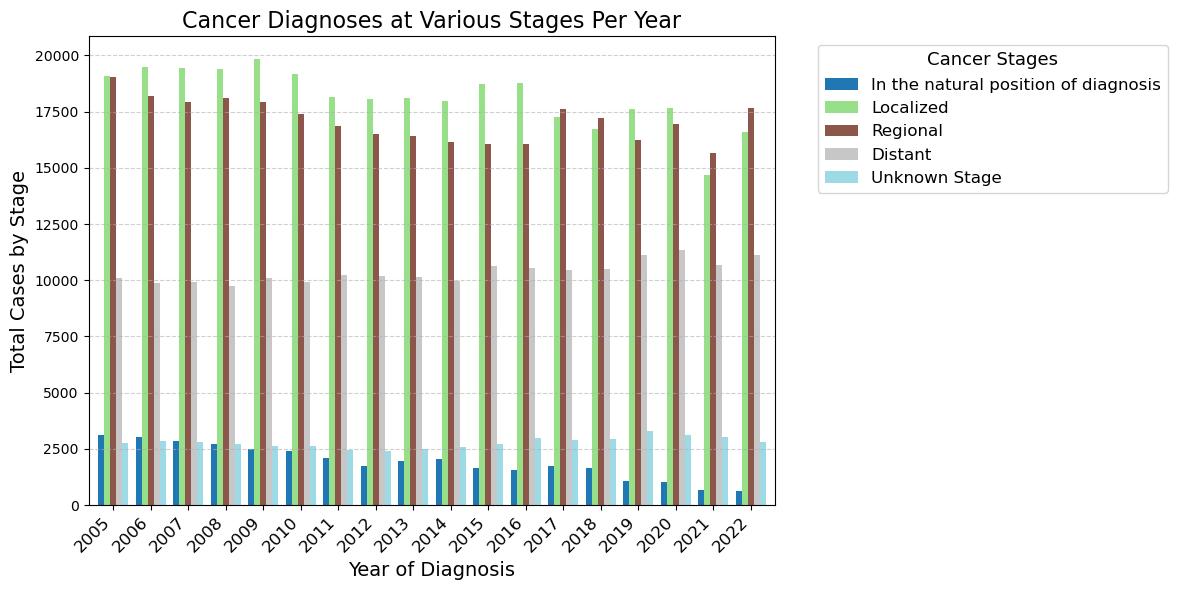

In [404]:
#Creating a bar graph for each stage diagnosed per year NOT stacked starting from 2005
# Plot the grouped bar chart (side-by-side bars for each stage)
ax = df_stages.plot(kind='bar', figsize=(12, 6), width=0.8, colormap='tab20', edgecolor='none')

# Add labels and title
ax.set_xlabel("Year of Diagnosis", fontsize=14)
ax.set_ylabel("Total Cases by Stage", fontsize=14)
ax.set_title("Cancer Diagnoses at Various Stages Per Year", fontsize=16)

# Format the y-axis to show whole numbers
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add gridlines for better visibility
plt.grid(True, axis='y', linestyle="--", alpha=0.6)

# Improve the legend 
ax.legend(title="Cancer Stages", title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Adjust layout to prevent overlap and make the plot more aesthetically pleasing
plt.tight_layout()

# Show the plot
plt.show()



## Line graph 

In [405]:
# Creating a line graph for each stage diagnosed per year starting from 2005
# Plot each stage as a separate trend line
plt.figure(figsize=(12, 6))
for column in stages_columns:
    plt.plot(df_stages.index, df_stages[column], marker="o", label=column)

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Cases by Stage")
plt.title("Cancer Diagnos at various stages Over Time")

# Formatting y-axis to show whole numbers (integers)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Set x-ticks to show each year in the data
plt.xticks(ticks=df_cleaned["Year"].unique(), rotation=45)  # Ensures each year is a tick, rotated for better readability

# Add a legend
plt.legend(title="Cancer Stage", fontsize=10, title_fontsize=12)

# Add gridlines for better visibility
plt.grid(True, linestyle="--", alpha=0.6)

# Set the y-axis limits (start at 1500, stop at 30000)
plt.ylim(0, 22000)

# Save the grouped bar graph (non-stacked)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig(os.path.join(output_dir, "stages_per_year_grouped_bar_graph.png"))
plt.close() 

# Show the plot
plt.show()


## Trend line 

In [406]:
# creating a trend line for Each stage diagnosed per year starting from 2005
# Plot each stage as a separate trend line
plt.figure(figsize=(12, 6))

for column in stages_columns:
    # Plot the data points for each stage
    plt.plot(df_stages.index, df_stages[column], marker="o", label=column)
    
    # Calculate the trend line (linear regression)
    slope, intercept, r_value, p_value, std_err = linregress(df_stages.index, df_stages[column])
    
    # Create the trend line
    trend_line = slope * df_stages.index + intercept
    
    # Plot the trend line
    plt.plot(df_stages.index, trend_line, linestyle='--', label=f'{column} Trend Line')

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Cases by Stage")
plt.title("Cancer Diagnoses at Various Stages Over Time with Trend Lines")

# Formatting y-axis to show whole numbers (integers)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Set x-ticks to show each year in the data
plt.xticks(ticks=df_cleaned["Year"].unique(), rotation=45)  # Ensures each year is a tick, rotated for better readability

# Add a legend
plt.legend(title="Cancer Stage", fontsize=10, title_fontsize=12)

# Add gridlines for better visibility
plt.grid(True, linestyle="--", alpha=0.6)

# Set the y-axis limits (start at 1500, stop at 30000)
plt.ylim(0, 22000)


# Save the trend line graph
plt.savefig(os.path.join(output_dir, "stages_over_time_with_trend_lines.png"))
plt.close()

# Show the plot
plt.show()


# All visuals of number of cases per race per year

## Table

In [407]:
#Table of the number of cases per year per race 
# Group by 'Year' and 'Race' and sum 'Total Documented Cases'
df_race_year = df_cleaned.groupby(["Year", "Race"])["Total Documented Cases"].sum()

print (df_race_year)


Year  Race  
2005  Black     22927
      Others     3148
      White     28056
2006  Black     22545
      Others     3144
      White     27722
2007  Black     22234
      Others     3199
      White     27509
2008  Black     22052
      Others     3191
      White     27424
2009  Black     22162
      Others     3162
      White     27618
2010  Black     21357
      Others     3211
      White     26914
2011  Black     20572
      Others     3154
      White     26046
2012  Black     20131
      Others     3119
      White     25598
2013  Black     20205
      Others     3193
      White     25717
2014  Black     19988
      Others     3144
      White     25542
2015  Black     20503
      Others     3100
      White     26184
2016  Black     20491
      Others     3167
      White     26246
2017  Black     20377
      Others     3199
      White     26344
2018  Black     19990
      Others     3160
      White     25888
2019  Black     20076
      Others     3190
      White     260

## Line graph 

In [ ]:
#Creating a line graph number for of cases per race per year 
# Group by 'Year' and 'Race' and sum 'Total Documented Cases'
df_race_year = df_cleaned.groupby(["Year", "Race"])["Total Documented Cases"].sum().unstack()

# Plot the data (you can adjust kind='line' or kind='bar' for the desired plot style)
df_race_year.plot(kind='line', figsize=(12, 6), marker="o")

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Documented Cases")
plt.title("Total Documented Cases Per Race Per Year")

# Formatting y-axis to show whole numbers (integers)
from matplotlib.ticker import MaxNLocator
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Set x-ticks to show each year in the data
plt.xticks(ticks=df_cleaned["Year"].unique(), rotation=45)  # Ensures each year is a tick, rotated for better readability

# Add a legend
plt.legend(title="Race", fontsize=10, title_fontsize=12)

# Add gridlines for better visibility
plt.grid(True, linestyle="--", alpha=0.6)

# Save the line graph
plt.savefig(os.path.join(output_dir, "cases_per_race_per_year_line_graph.png"))
plt.close()  


# Show the plot
plt.show()


## Bar graph

In [426]:
#Creating a bar graph for the number of cases per year per race
# Group by 'Year' and 'Race' and sum 'Total Documented Cases'
df_race_year = df_cleaned.groupby(["Year", "Race"])["Total Documented Cases"].sum().unstack()

# Plot the data as a bar graph
df_race_year.plot(kind='bar', stacked=False, figsize=(12, 6))

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Documented Cases")
plt.title("Total Documented Cases Per Race Per Year")

# Formatting y-axis to show whole numbers (integers)
from matplotlib.ticker import MaxNLocator
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Set x-ticks to show each year in the data
plt.xticks(rotation=45)  # Ensures each year is a tick, rotated for better readability

# Add a legend
plt.legend(title="Race", fontsize=10, title_fontsize=12)

# Add gridlines for better visibility
plt.grid(True, axis='y', linestyle="--", alpha=0.6)

# Save the bar graph
plt.savefig(os.path.join(output_dir, "cases_per_race_per_year_bar_graph.png"))
plt.close()

# Show the plot
plt.show()


## Trend line

In [430]:
# Creating a trend line for Diagnosis for Ethnicities per year 
# Group by 'Year' and 'Race' and sum 'Total Documented Cases'
df_race_year = df_cleaned.groupby(["Year", "Race"])["Total Documented Cases"].sum().unstack()

# Plot the data for each race (with markers)
plt.figure(figsize=(12, 6))
df_race_year.plot(kind='line', marker="o", ax=plt.gca())

# Add trend lines for each race
for race in df_race_year.columns:
    # Get the data for this race
    race_data = df_race_year[race].dropna()  # Remove any NaN values
    
    # Perform linear regression (find the slope and intercept)
    slope, intercept, r_value, p_value, std_err = linregress(race_data.index, race_data.values)
    
    # Calculate the trend line for the race
    trend_line = slope * race_data.index + intercept
    
    # Plot the trend line for the race (dashed line)
    plt.plot(race_data.index, trend_line, linestyle='--', label=f'{race} Trend Line')

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Documented Cases")
plt.title("Total Documented Cases Per Race Per Year with Trend Lines")

# Formatting y-axis to show whole numbers (integers)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Set x-ticks to show each year in the data
plt.xticks(ticks=df_cleaned["Year"].unique(), rotation=45)  # Ensures each year is a tick, rotated for better readability

# Add a legend
plt.legend(title="Race & Trend Line", fontsize=10, title_fontsize=12)

# Add gridlines for better visibility
plt.grid(True, linestyle="--", alpha=0.6)

# Save the trend line plot
plt.savefig(os.path.join(output_dir, "cases_per_race_per_year_with_trend_lines.png"))
plt.close()

# Show the plot
plt.show()


# All Visuals for Sex

## Table 

In [411]:
# Table for Total cases per year per sex
# Group by 'Year' and 'Sex' and sum 'Total Documented Cases'
df_sex_year = df_cleaned.groupby(["Year", "Sex"])["Total Documented Cases"].sum().unstack()

print(df_sex_year)

Sex   Female   Male
Year               
2005   27268  26863
2006   27014  26397
2007   26898  26044
2008   26348  26319
2009   26437  26505
2010   25947  25535
2011   25132  24640
2012   24416  24432
2013   24618  24497
2014   24264  24410
2015   24581  25206
2016   24601  25303
2017   24969  24951
2018   24599  24439
2019   24590  24760
2020   24575  25563
2021   22397  22313
2022   24413  24444


## Bar Graph

In [429]:

# creating a bar graph  for Total cases per year per sex
# Group by 'Year' and 'Sex' and sum 'Total Documented Cases'
df_sex_year = df_cleaned.groupby(["Year", "Sex"])["Total Documented Cases"].sum().unstack()

# Plot a bar graph
df_sex_year.plot(kind='bar', figsize=(12, 6), stacked=False)

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Documented Cases")
plt.title("Total Documented Cancer Cases Per Year Per Sex")

# Formatting y-axis to show whole numbers (integers)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Set x-ticks to show each year in the data
plt.xticks(rotation=45)

# Add a legend
plt.legend(title="Sex", fontsize=10, title_fontsize=12)

# Add gridlines for better visibility
plt.grid(True, axis='y', linestyle="--", alpha=0.6)

# Save the bar graph
plt.savefig(os.path.join(output_dir, "cases_per_sex_per_year_bar_graph.png"))
plt.close()

# Show the plot
plt.show()


## Line graph 

In [433]:
# creating a trend line for Total cases per year per sex
# Group by 'Year' and 'Sex' and sum 'Total Documented Cases'
df_sex_year = df_cleaned.groupby(["Year", "Sex"])["Total Documented Cases"].sum().unstack()

# Plot a line graph
df_sex_year.plot(kind='line', figsize=(12, 6), marker="o")

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Documented Cases")
plt.title("Total Documented Cancer Cases Per Year Per Sex")

# Formatting y-axis to show whole numbers (integers)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Set x-ticks to show each individual year
plt.xticks(df_sex_year.index, rotation=45)

# Add a legend
plt.legend(title="Sex", fontsize=10, title_fontsize=12)

# Add gridlines for better visibility
plt.grid(True, linestyle="--", alpha=0.6)

# Save the line graph
plt.savefig(os.path.join(output_dir, "cases_per_sex_per_year_line_graph.png"))
plt.close()

# Show the plot
plt.show()



## Trend line 

In [434]:
# Trend line for total documented cases per sex per year 
# Group by 'Year' and 'Sex' and sum 'Total Documented Cases'
df_sex_year = df_cleaned.groupby(["Year", "Sex"])["Total Documented Cases"].sum().unstack()

# Plot the original data (line plot)
plt.figure(figsize=(12, 6))

# Loop through each sex category to plot the lines and trend lines
for sex in df_sex_year.columns:
    # Plot the line for the current sex category
    plt.plot(df_sex_year.index, df_sex_year[sex], marker="o", label=sex)

    # Calculate the trend line (linear regression)
    slope, intercept, r_value, p_value, std_err = linregress(df_sex_year.index, df_sex_year[sex])

    # Create the trend line
    trend_line = slope * df_sex_year.index + intercept

    # Plot the trend line
    plt.plot(df_sex_year.index, trend_line, linestyle='--', label=f'{sex} Trend Line')

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Documented Cases")
plt.title("Total Documented Cancer Cases Per Year Per Sex with Trend Lines")

# Formatting y-axis to show whole numbers (integers)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Set x-ticks to show each individual year
plt.xticks(df_sex_year.index, rotation=45)

# Add a legend
plt.legend(title="Sex", fontsize=10, title_fontsize=12)

# Add gridlines for better visibility
plt.grid(True, linestyle="--", alpha=0.6)

# Save the trend line plot
plt.savefig(os.path.join(output_dir, "cases_per_sex_per_year_with_trend_lines.png"))
plt.close()

# Show the plot
plt.show()


In [435]:
#For only males 
# Filter the data to include only males
df_male = df_cleaned[df_cleaned["Sex"] == "Male"]

# Group by 'Year' and sum 'Total Documented Cases' for males only
df_male_year = df_male.groupby("Year")["Total Documented Cases"].sum()

# Plot the original data for males
plt.figure(figsize=(12, 6))
plt.plot(df_male_year.index, df_male_year, marker="o", label="Male")

# Calculate the trend line (linear regression) for males
slope, intercept, r_value, p_value, std_err = linregress(df_male_year.index, df_male_year)

# Create the trend line for males
trend_line = slope * df_male_year.index + intercept

# Plot the trend line for males
plt.plot(df_male_year.index, trend_line, linestyle='--', label='Male Trend Line')

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Documented Cases")
plt.title("Total Documented Cancer Cases for Males Per Year with Trend Line")

# Formatting y-axis to show whole numbers (integers)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Set x-ticks to show each individual year
plt.xticks(df_male_year.index, rotation=45)

# Add a legend
plt.legend(title="Sex", fontsize=10, title_fontsize=12)

# Add gridlines for better visibility
plt.grid(True, linestyle="--", alpha=0.6)

# Save the male trend line plot
plt.savefig(os.path.join(output_dir, "cases_for_males_per_year_with_trend_line.png"))
plt.close()

# Show the plot
plt.show()


In [437]:
# Female only
# Filter the data to include only females
df_female = df_cleaned[df_cleaned["Sex"] == "Female"]

# Group by 'Year' and sum 'Total Documented Cases' for females only
df_female_year = df_female.groupby("Year")["Total Documented Cases"].sum()

# Plot the original data for females
plt.figure(figsize=(12, 6))
plt.plot(df_female_year.index, df_female_year, marker="o", label="Female")

# Calculate the trend line (linear regression) for females
slope, intercept, r_value, p_value, std_err = linregress(df_female_year.index, df_female_year)

# Create the trend line for females
trend_line = slope * df_female_year.index + intercept

# Plot the trend line for females
plt.plot(df_female_year.index, trend_line, linestyle='--', label='Female Trend Line')

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Documented Cases")
plt.title("Total Documented Cancer Cases for Females Per Year with Trend Line")

# Formatting y-axis to show whole numbers (integers)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Set x-ticks to show each individual year
plt.xticks(df_female_year.index, rotation=45)

# Add a legend
plt.legend(title="Sex", fontsize=10, title_fontsize=12)

# Add gridlines for better visibility
plt.grid(True, linestyle="--", alpha=0.6)

# Save the female trend line plot
plt.savefig(os.path.join(output_dir, "cases_for_females_per_year_with_trend_line.png"))
plt.close()

# Show the plot
plt.show()


## All visuals for Age

## Table

In [417]:
# table for all documented cases by age per year
# Group by 'Year' and 'Age', then sum the 'Total Documented Cases'
df_age_year = df_cleaned.groupby(["Year", "Age"])["Total Documented Cases"].sum().unstack()

# Display the resulting table
print(df_age_year)


Age   1-4 years  10-14 years  15-19 years  20-24 years  25-29 years  \
Year                                                                  
2005          0            6           34           80          115   
2006          0            6           30           52          141   
2007          0           10           29           70          134   
2008          0            5           23           53          139   
2009          0            4           32           63          134   
2010          0            0           29           65          146   
2011          0            6           24           83          167   
2012          0           14           27           88          168   
2013          0            8           42          101          204   
2014          0           32           56           84          169   
2015          0           32           70           96          261   
2016          0           69          133          198          312   
2017  

## Bar Graph

In [438]:
# Paragraphed of total documented cases of cancer per year per age group
# Plotting the grouped bar chart (side-by-side bars for each age group)
ax = df_age_year.plot(kind='bar', figsize=(12, 6), width=0.8, colormap='tab20', edgecolor='none')

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Documented Cases")
plt.title("Cancer Diagnoses by Age Group Paragraphed of total documented cases of cancer per year per age groupper Year")

# Format the y-axis to show whole numbers
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for better visibility
plt.grid(True, axis='y', linestyle="--", alpha=0.6)


# Save the bar graph
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "cancer_diagnoses_by_age_group_per_year.png"))
plt.close()

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [443]:
# Bar graph total documented cases per age group 
# Group by 'Age' and sum 'Total Documented Cases'
df_age_cases = df_cleaned.groupby('Age')['Total Documented Cases'].sum()

# Plotting the bar chart with total documented cases against age
ax = df_age_cases.plot(kind='bar', figsize=(12, 6), width=0.8, colormap='tab20', edgecolor='none')

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Total Documented Cases")
plt.title("Cancer Diagnoses by Age")

# Format the y-axis to show whole numbers
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Rotate x-axis labels for better readability 
plt.xticks(rotation=45)

# Add gridlines for better visibility
plt.grid(True, axis='y', linestyle="--", alpha=0.6)


# Save the bar graph for total cases by age
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "total_cases_by_age_group_bargraph.png"))
plt.close()

# Show the plot
plt.tight_layout()
plt.show()



<Figure size 640x480 with 0 Axes>

## Line Graph

In [444]:

# Plotting the line graph instead of the grouped bar chart
ax = df_age_year.plot(kind='line', figsize=(12, 6), marker='o', colormap='tab20')

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Documented Cases")
plt.title("Cancer Diagnoses by Age Group per Year")

# Format the y-axis to show whole numbers
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for better visibility
plt.grid(True, axis='y', linestyle="--", alpha=0.6)


# Save the line graph
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "cancer_diagnoses_by_age_group_line_graph.png"))
plt.close()

# Show the plot
plt.tight_layout()
plt.show()



<Figure size 640x480 with 0 Axes>

In [445]:

# Plotting the line graph with total documented cases against age
ax = df_age_cases.plot(kind='line', figsize=(12, 6), marker='o', colormap='tab20')

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Total Documented Cases")
plt.title("Cancer Diagnoses by Age")

# Format the y-axis to show whole numbers
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Ensure that each unique age value is shown on the x-axis
plt.xticks(ticks=range(len(df_age_cases.index)), labels=df_age_cases.index, rotation=45)

# Add gridlines for better visibility
plt.grid(True, axis='y', linestyle="--", alpha=0.6)


# Save the line graph for total cases by age
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "total_cases_by_age_line_graph.png"))
plt.close()

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

## Trend line 

In [446]:

# Plotting the line graph instead of the grouped bar chart
ax = df_age_year.plot(kind='line', figsize=(12, 6), marker='o', colormap='tab20')

# Add trend lines (linear regression) for each age group
for column in df_age_year.columns:
    # Get the data for the specific age group (column)
    y = df_age_year[column]
    x = np.array(range(len(y)))  # Create an x-axis array (index of years)
    
    # Perform linear regression to get the slope and intercept
    slope, intercept, _, _, _ = linregress(x, y)
    
    # Calculate the trend line using the slope and intercept
    trend_line = slope * x + intercept
    
    # Plot the trend line
    ax.plot(df_age_year.index, trend_line, label=f"{column} Trend", linestyle='--', color=ax.get_lines()[-1].get_color())

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Documented Cases")
plt.title("Cancer Diagnoses by Age Group per Year with Trend Lines")

# Format the y-axis to show whole numbers
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for better visibility
plt.grid(True, axis='y', linestyle="--", alpha=0.6)

# Show the legend
plt.legend()


# Save the trend line plot for age groups
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "cancer_diagnoses_by_age_group_with_trend_lines.png"))
plt.close()

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [447]:
# Trend line total documented cases per age group
# Plotting the trend line with total documented cases against age
ax = df_age_cases.plot(kind='line', figsize=(12, 6), marker='o', colormap='tab20')

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Total Documented Cases")
plt.title("Cancer Diagnoses by Age")

# Format the y-axis to show whole numbers
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Ensure that each unique age value is shown on the x-axis
plt.xticks(ticks=range(len(df_age_cases.index)), labels=df_age_cases.index, rotation=45)

# Add gridlines for better visibility
plt.grid(True, axis='y', linestyle="--", alpha=0.6)

# Save the trend line plot for total cases by age
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "total_cases_by_age_with_trend_line.png"))
plt.close()

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

# Extra Visuals 

In [448]:
print("All visuals for cancer diagnoses by age have been saved to the 'output_data' folder.")

All visuals for cancer diagnoses by age have been saved to the 'output_data' folder.


In [424]:
# Creating a graph for toal in In the natural position of diagnosis' per year with whole numbers